In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=true')
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
(insurance.isnull().sum()/insurance.shape[0])*100

age         0.0
gender      0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
(insurance.isnull().sum().sum()/(insurance.shape[0]*insurance.shape[1]))*100

0.0

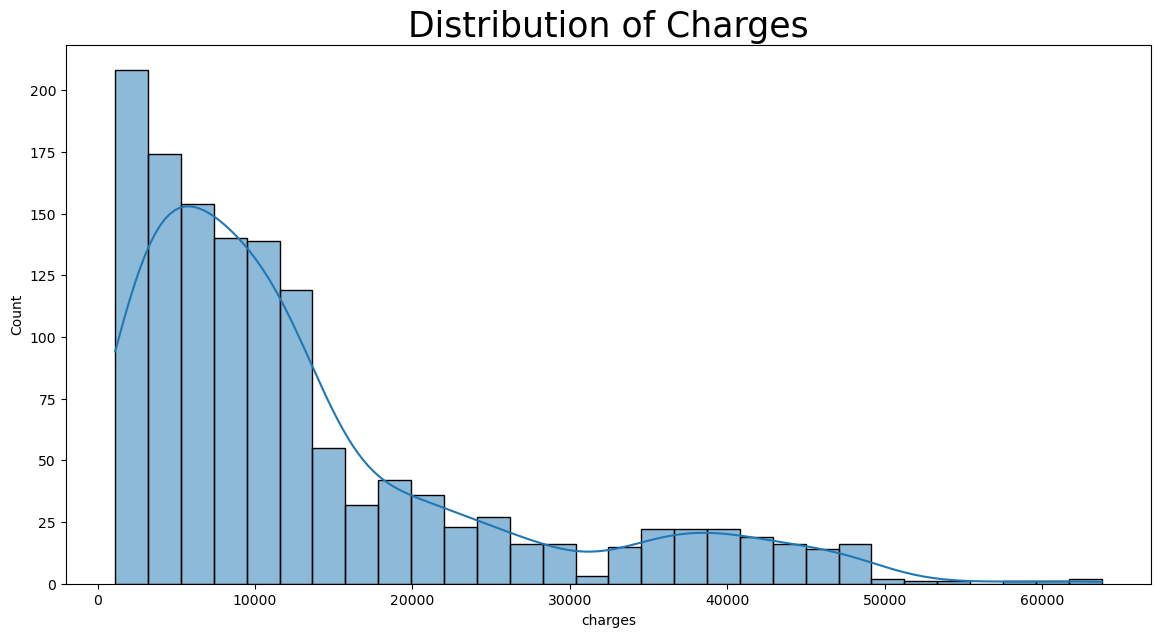

In [8]:
plt.figure(figsize=(14,7))
sns.histplot(data=insurance,x='charges',kde=True)
plt.title('Distribution of Charges',size=25)
plt.show()

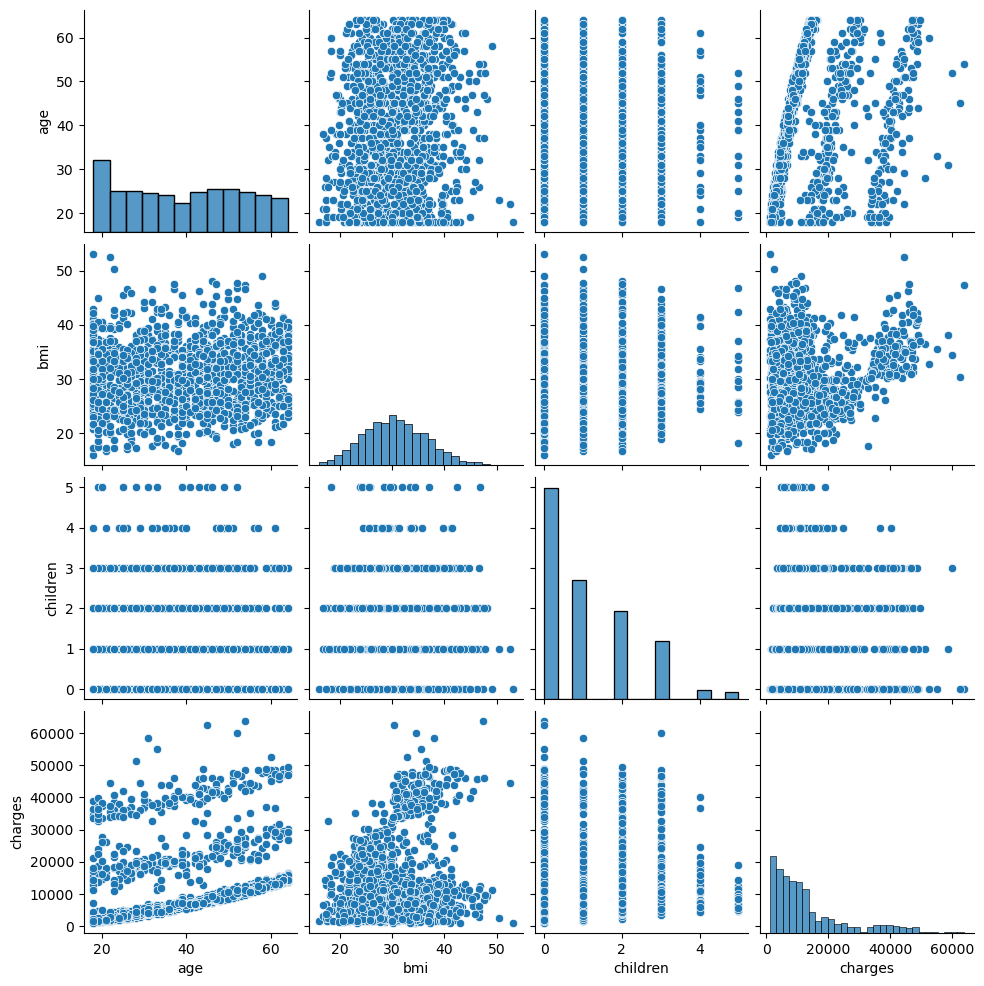

In [6]:
sns.pairplot(insurance)

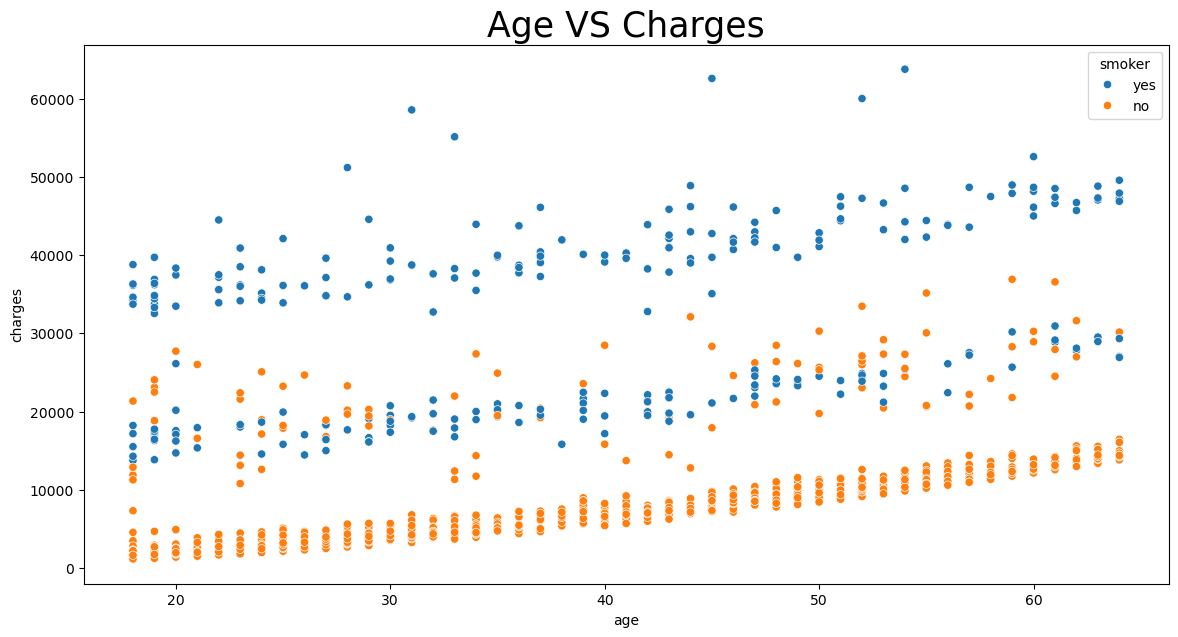

In [7]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=insurance,x='age',y='charges',hue = 'smoker')
plt.title('Age VS Charges',size=25)
plt.show()

In [8]:
# This show non smoker have more records 

In [9]:
insurance_corr = insurance.corr(numeric_only=True)
insurance_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


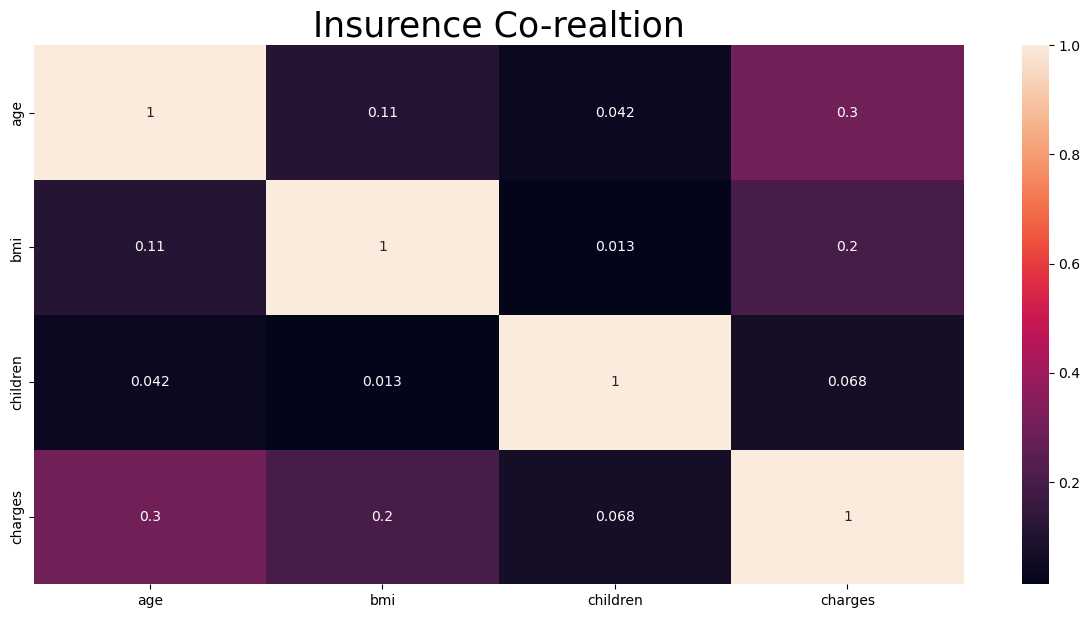

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(data = insurance_corr,annot=True)
plt.title('Insurence Co-realtion',size=25)
plt.show()

#### Encoding 

In [11]:
# Label encoding :
# > > Having ranking

# EX:
# low      0
# medium   1
# high     2


# Make categorical value into 0,1,2..

In [12]:
# One hot encoding :
# > Having no ranking
# > We make column in case not ranking.

# EX:
# blue  0
# green 1
# red   2

# blue red green 
# 0     0    1
# 0     0    1
# 1     0    0
# 0     1    0



In [13]:
# Note :
# > When two value use label encoding
# > If more check label or one hot

In [14]:
# 1st way: 

# from sklearn.preprocessing import LabelEncoder
# label_encode = LabelEncoder()

In [15]:
# label_encode.fit(insurance['gender'])
# We use this so when we use in future it make data change in same order

In [16]:
# insurance['gender']=label_encode.transform(insurance['gender'])

In [17]:
# Take from user
# label_encode.transform(['male'])

In [10]:
# 2nd way
# To make male = 0 , female = 1
insurance['gender'] = insurance['gender'].map({'male':0,'female':1})

In [11]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [20]:
# from sklearn.preprocessing import LabelEncoder
# label_encode = LabelEncoder()
# label_encode.fit(insurance['smoker'])

In [21]:
# insurance['smoker']=label_encode.transform(insurance['smoker'])

In [12]:
insurance['smoker']=insurance['smoker'].map({'yes':1,'no':0})

In [13]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [20]:
# To encode region we use One hot encoding 
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [22]:
# Have only 2D array
one_hot_encoder.fit(insurance[['region']])

OneHotEncoder()

In [26]:
region_encoded = one_hot_encoder.transform(insurance[['region']]).toarray()

In [27]:
region_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [28]:
one_hot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [29]:
temp = pd.DataFrame(region_encoded,columns=['northeast', 'northwest', 'southeast', 'southwest'],dtype='int')

In [30]:
temp.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [31]:
insurance = pd.concat([insurance,temp],axis=1)

In [32]:
insurance.drop('region',axis=1,inplace=True)

In [33]:
insurance.head()

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [34]:
x = insurance.drop(['charges'],axis=1)
y = insurance['charges']

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression()

In [38]:
x_test.iloc[0]

age          45.000
gender        1.000
bmi          25.175
children      2.000
smoker        0.000
northeast     1.000
northwest     0.000
southeast     0.000
southwest     0.000
Name: 764, dtype: float64

In [40]:
# insurance[insurance['age']==45]

In [39]:
y_test[764]

9095.06825

In [40]:
lm.predict([[45,1,25.175,2,0,1,0,0,0]]) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8969.55027444])

In [41]:
lm.score(x_test,y_test)*100

78.35929767120724

In [42]:
per = lm.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
mse = mean_squared_error(y_test, per)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 33596915.85136145


In [48]:
r2_score(y_test,per)*100

78.35929767120724

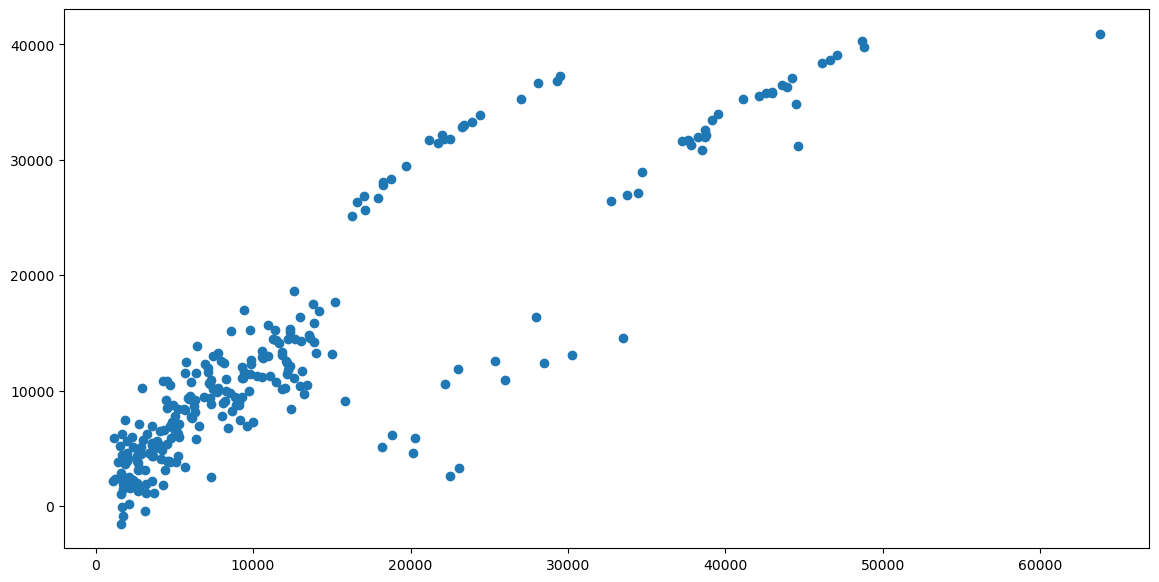

In [49]:
plt.figure(figsize=(14,7))
plt.scatter(y_test,per) 
plt.show()

In [51]:
import xgboost as xgb

In [52]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 5,
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the model
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

# Predict on test data
y_pred = bst.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 20575253.454033673


In [53]:
r2_score(y_test,y_pred)*100

86.74691042153607